In [9]:
import sys
print(sys.executable)
print(sys.version)

C:\Users\om885\AppData\Local\Programs\Python\Python311\python.exe
3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]


# CODEALPHA TASK-3: HANDWRITTEN CHARACTER RECOGNITION

In [13]:
import sys
import pkg_resources

# List of required packages
required_packages = [
    'numpy',
    'matplotlib',
    'tensorflow',
    'tensorflow-datasets'
]

# Check each package
for package in required_packages:
    try:
        dist = pkg_resources.get_distribution(package)
        print(f"✅ {package} is installed (Version: {dist.version})")
    except pkg_resources.DistributionNotFound:
        print(f"❌ {package} is NOT installed")

✅ numpy is installed (Version: 2.1.3)
✅ matplotlib is installed (Version: 3.10.3)
✅ tensorflow is installed (Version: 2.19.0)
✅ tensorflow-datasets is installed (Version: 4.9.9)


In [12]:
import sys
!{sys.executable} -m pip install tensorflow-datasets


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# Print MNIST info
print("MNIST Dataset Info:")
print(f"Training images shape: {x_train_mnist.shape}")  # (60000, 28, 28)
print(f"Training labels shape: {y_train_mnist.shape}")  # (60000,)
print("\nFirst 5 MNIST training samples:")

# Display first 5 samples
for i in range(5):
    print(f"Label: {y_train_mnist[i]}")
    print(f"Image shape: {x_train_mnist[i].shape}")
    print(f"Pixel range: {np.min(x_train_mnist[i])}-{np.max(x_train_mnist[i])}\n")

MNIST Dataset Info:
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)

First 5 MNIST training samples:
Label: 5
Image shape: (28, 28)
Pixel range: 0-255

Label: 0
Image shape: (28, 28)
Pixel range: 0-255

Label: 4
Image shape: (28, 28)
Pixel range: 0-255

Label: 1
Image shape: (28, 28)
Pixel range: 0-255

Label: 9
Image shape: (28, 28)
Pixel range: 0-255



In [15]:
import tensorflow_datasets as tfds

# Load EMNIST Letters
emnist_train, emnist_test = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True
)

# Convert to numpy (first 5 samples only)
print("\nEMNIST Letters Dataset Info:")
emnist_samples = list(emnist_train.take(5))  # Get first 5 samples

for i, (image, label) in enumerate(emnist_samples):
    print(f"\nSample {i+1}:")
    print(f"Label (before adjustment): {label}")  # A=1, B=2,... (will be adjusted to 0-25 later)
    print(f"Image shape: {image.shape}")  # (28, 28, 1)
    print(f"Pixel range: {np.min(image)}-{np.max(image)}")


EMNIST Letters Dataset Info:

Sample 1:
Label (before adjustment): 25
Image shape: (28, 28, 1)
Pixel range: 0-255

Sample 2:
Label (before adjustment): 7
Image shape: (28, 28, 1)
Pixel range: 0-255

Sample 3:
Label (before adjustment): 25
Image shape: (28, 28, 1)
Pixel range: 0-255

Sample 4:
Label (before adjustment): 11
Image shape: (28, 28, 1)
Pixel range: 0-255

Sample 5:
Label (before adjustment): 10
Image shape: (28, 28, 1)
Pixel range: 0-255


🔍 TensorFlow: 2.19.0
🔍 NumPy: 2.1.3
📥 Loading MNIST...
📥 Loading EMNIST Letters...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 448)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 7, 256)              │         590,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 795,556 (3.03 MB)

 Trainable params: 795,364 (3.03 MB)

 Non-trainable params: 192 (768.00 B)


🚀 Training model...


C:\Users\om885\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 426s 421ms/step - accuracy: 0.4732 - loss: 1.8402 - val_accuracy: 0.8903 - val_loss: 0.3565
Epoch 2/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 571s 609ms/step - accuracy: 0.8594 - loss: 0.4667 - val_accuracy: 0.8763 - val_loss: 0.4274
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 368s 393ms/step - accuracy: 0.8944 - loss: 0.3500 - val_accuracy: 0.9297 - val_loss: 0.2206
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 394s 420ms/step - accuracy: 0.9102 - loss: 0.3001 - val_accuracy: 0.9154 - val_loss: 0.2842
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 388s 414ms/step - accuracy: 0.9185 - loss: 0.2716 - val_accuracy: 0.9301 - val_loss: 0.2361
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 390s 416ms/step - accuracy: 0.9247 - loss: 0.2522 - val_accuracy: 0.9347 - val_loss: 0.1990
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 392s 418ms/step - accuracy: 0.9282 - loss: 0.2381 - val_accuracy: 0.9456 - val_loss: 0.1612
Epoch 8/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 355s 378ms/step - accuracy: 0.9322 -

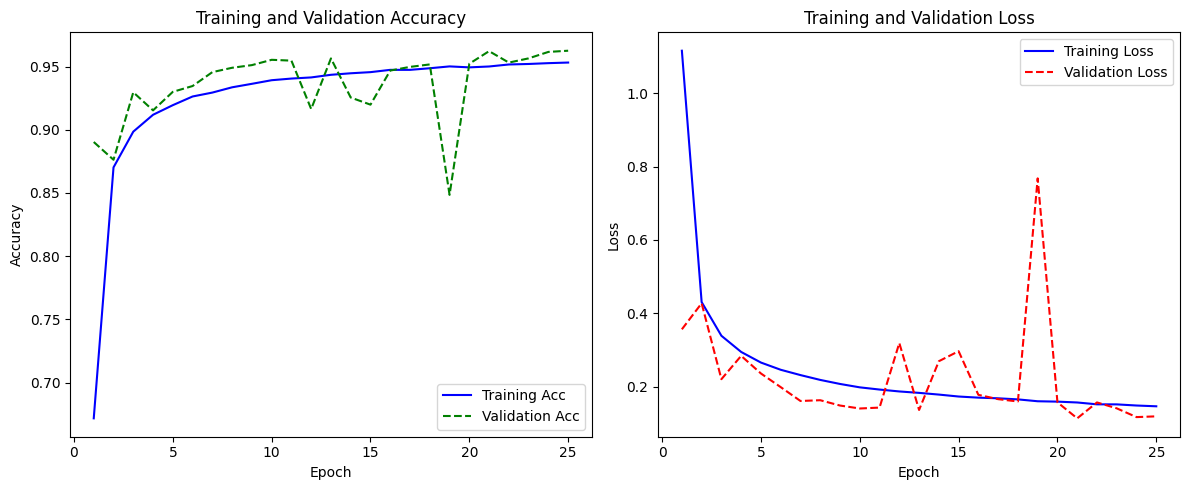


📊 Evaluating on test set...
625/625 - 20s - 31ms/step - accuracy: 0.9626 - loss: 0.1193
✅ Final Test Accuracy: 96.26%

🔍 Sample Predictions (Digits & Letters):


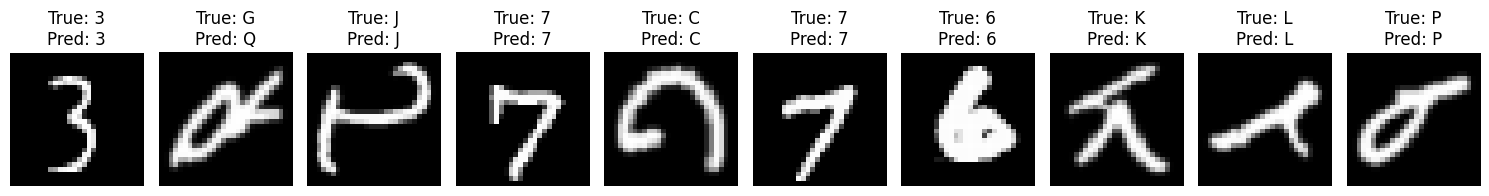


✍️ Predicted Sentence:


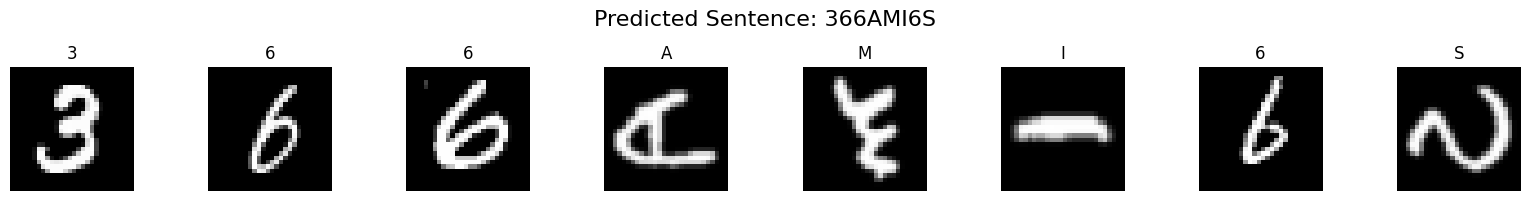


🔢 Predicting Digits 0–9:


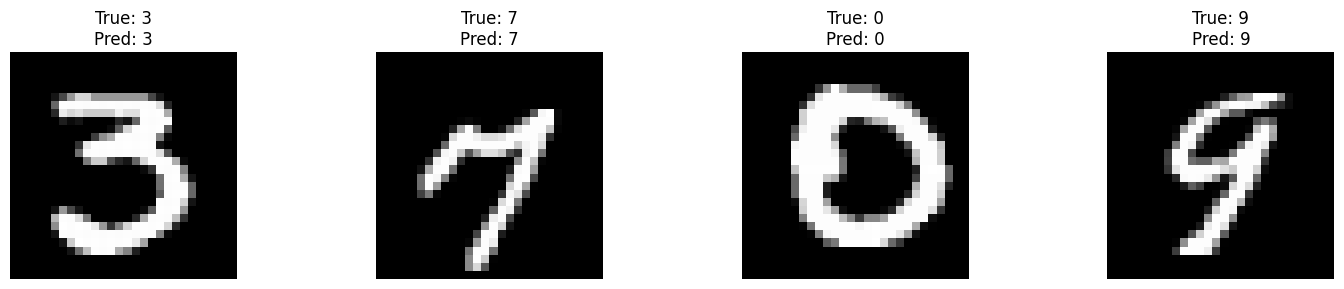


🔤 Predicting Letters A–Z:


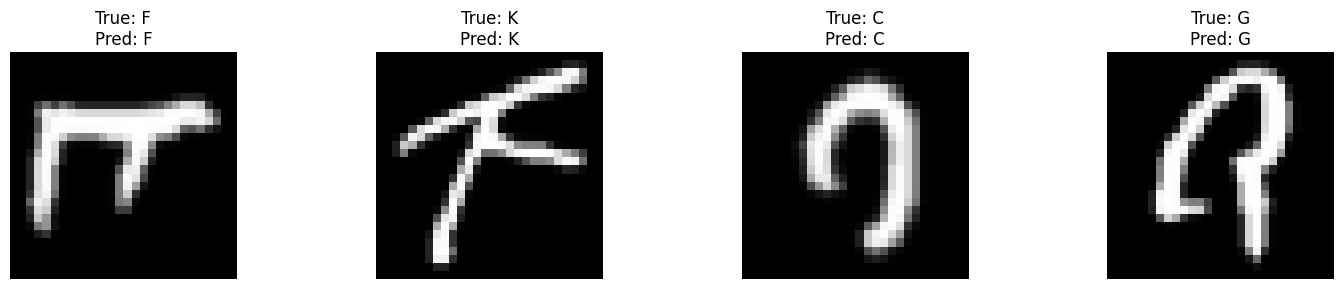


🔀 Predicting Mixed Characters:


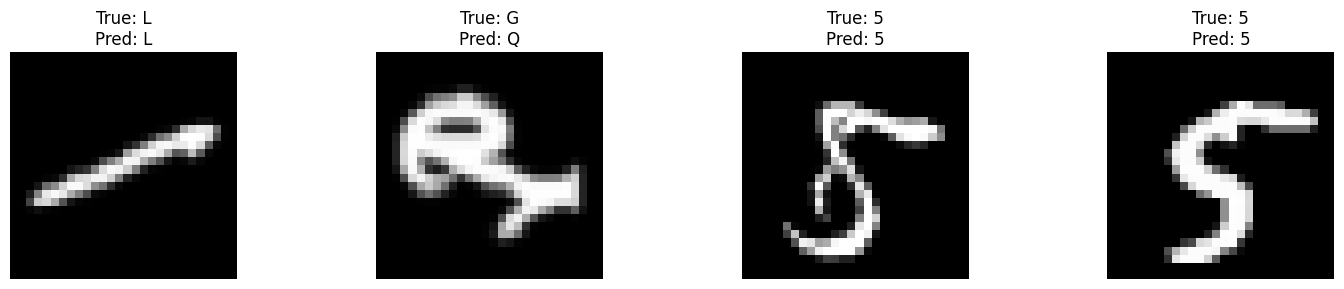

💾 Model saved as crnn_emnist_mnist_model.h5


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.utils import to_categorical
import tensorflow_datasets as tfds
from sklearn.utils import resample
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ==================== ENVIRONMENT CHECK ====================
print("🔍 TensorFlow:", tf.__version__)
print("🔍 NumPy:", np.__version__)

# ==================== LOAD DATASETS ====================
def load_datasets():
    print("📥 Loading MNIST...")
    (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

    print("📥 Loading EMNIST Letters...")
    emnist_train, emnist_test = tfds.load('emnist/letters', split=['train', 'test'], as_supervised=True)

    def convert_emnist(ds):
        images, labels = [], []
        for img, label in tfds.as_numpy(ds):
            images.append(img)
            labels.append(label)
        return np.array(images), np.array(labels)

    x_train_emnist, y_train_emnist = convert_emnist(emnist_train)
    x_test_emnist, y_test_emnist = convert_emnist(emnist_test)

    return (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist), (x_train_emnist, y_train_emnist), (x_test_emnist, y_test_emnist)

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist), (x_train_emnist, y_train_emnist), (x_test_emnist, y_test_emnist) = load_datasets()

# ==================== PREPROCESS ====================
def preprocess(images, labels):
    images = images.astype("float32") / 255.0
    if images.ndim == 3:
        images = np.expand_dims(images, axis=-1)
    return images, labels

x_train_mnist, y_train_mnist = preprocess(x_train_mnist, y_train_mnist)
x_test_mnist, y_test_mnist = preprocess(x_test_mnist, y_test_mnist)
x_train_emnist, y_train_emnist = preprocess(x_train_emnist, y_train_emnist)
x_test_emnist, y_test_emnist = preprocess(x_test_emnist, y_test_emnist)

# Adjust EMNIST labels (1–26 → 10–35 for A-Z)
y_train_emnist = y_train_emnist - 1 + 10
y_test_emnist = y_test_emnist - 1 + 10

# ==================== BALANCE DATA ====================
x_train_emnist, y_train_emnist = resample(x_train_emnist, y_train_emnist,
                                          replace=False, n_samples=len(x_train_mnist),
                                          stratify=y_train_emnist, random_state=42)

x_test_emnist, y_test_emnist = resample(x_test_emnist, y_test_emnist,
                                        replace=False, n_samples=len(x_test_mnist),
                                        stratify=y_test_emnist, random_state=42)

# ==================== COMBINE & ENCODE ====================
x_train = np.concatenate([x_train_mnist, x_train_emnist])
y_train = np.concatenate([y_train_mnist, y_train_emnist])
x_test = np.concatenate([x_test_mnist, x_test_emnist])
y_test = np.concatenate([y_test_mnist, y_test_emnist])

num_classes = 36  # Digits 0–9 and Letters A–Z
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ==================== AUGMENTATION ====================
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# ==================== BUILD CRNN ====================
def build_crnn_model(input_shape=(28, 28, 1), num_classes=36):
    model = models.Sequential([
        Input(shape=input_shape),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Reshape((7, 7 * 64)),  # 7x7x64 -> (7, 448)

        layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
        layers.Bidirectional(layers.LSTM(64, dropout=0.3, recurrent_dropout=0.3)),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_crnn_model()
model.summary()

# ==================== TRAIN ====================
print("\n🚀 Training model...")
history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=128),
    epochs=25,
    validation_data=(x_test, y_test_cat),
    verbose=1
)

# ==================== PLOT TRAINING ====================
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Acc')
    plt.plot(epochs, val_acc, 'g--', label='Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(history)

# ==================== EVALUATE ====================
print("\n📊 Evaluating on test set...")
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"✅ Final Test Accuracy: {test_acc*100:.2f}%")

# ==================== PREDICT & SHOW ====================
def decode_label(label):
    return str(label) if label < 10 else chr(ord('A') + label - 10)

def show_predictions(model, images, labels, num=10):
    plt.figure(figsize=(15, 3))
    for i in range(num):
        img = images[i]
        true = labels[i]
        pred = model.predict(np.expand_dims(img, axis=0), verbose=0)
        pred_label = np.argmax(pred)
        plt.subplot(1, num, i + 1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f"True: {decode_label(true)}\nPred: {decode_label(pred_label)}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# ==================== SAMPLE PREDICTIONS ====================
print("\n🔍 Sample Predictions (Digits & Letters):")
mixed_indices = np.random.choice(len(x_test), 10, replace=False)
show_predictions(model, x_test[mixed_indices], y_test[mixed_indices], num=10)

# ==================== SENTENCE PREDICTION ====================
print("\n✍️ Predicted Sentence:")
sentence_indices = np.random.choice(len(x_test), 8, replace=False)
plt.figure(figsize=(16, 2))
sentence = ""
for i, idx in enumerate(sentence_indices):
    img = x_test[idx]
    pred = np.argmax(model.predict(np.expand_dims(img, axis=0), verbose=0))
    char = decode_label(pred)
    sentence += char
    plt.subplot(1, 8, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"{char}")
    plt.axis('off')
plt.suptitle(f"Predicted Sentence: {sentence}", fontsize=16)
plt.tight_layout()
plt.show()

# ==================== EXAMPLES: DIGITS ====================
print("\n🔢 Predicting Digits 0–9:")
digit_indices = np.where(y_test < 10)[0]
np.random.shuffle(digit_indices)
show_predictions(model, x_test[digit_indices[:4]], y_test[digit_indices[:4]], num=4)

# ==================== EXAMPLES: LETTERS ====================
print("\n🔤 Predicting Letters A–Z:")
letter_indices = np.where((y_test >= 10) & (y_test < 36))[0]
np.random.shuffle(letter_indices)
show_predictions(model, x_test[letter_indices[:4]], y_test[letter_indices[:4]], num=4)

# ==================== EXAMPLES: MIXED ====================
print("\n🔀 Predicting Mixed Characters:")
mixed_indices = np.random.choice(len(x_test), 4, replace=False)
show_predictions(model, x_test[mixed_indices], y_test[mixed_indices], num=4)

# ==================== SAVE MODEL ====================
model.save("crnn_emnist_mnist_model.h5")
print("💾 Model saved as crnn_emnist_mnist_model.h5")
